In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from scipy.stats import t
!pip install pingouin
import pingouin
!pip install bs4
from bs4 import BeautifulSoup
!pip install urllib3
from urllib.request import Request, urlopen
!pip install requests
import requests
!pip install lxml
import lxml
!pip install PdfReader
from PyPDF2 import PdfReader

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


# Data Understanding / Preparation  

# Section 1. Exploring Datasets

In [2]:
# Using an example dataset determine file encoding format to ensure we can read this date into a dataframe
with open("data/ProdVolumeQuarters.csv") as file:
    print(file)

<_io.TextIOWrapper name='data/ProdVolumeQuarters.csv' mode='r' encoding='UTF-8'>


In [3]:
# Reviewing this datafile to view observations and features
df = pd.read_csv ("data/ProdVolumeQuarters.csv")
df.shape

(4, 59)

In [4]:
# list all the features of the datset
print (df.columns.values)

['freq' 'indic_bt' 'nace_r2' 's_adj' 'unit' 'geo\\TIME_PERIOD' '2010-Q1 '
 '2010-Q2 ' '2010-Q3 ' '2010-Q4 ' '2011-Q1 ' '2011-Q2 ' '2011-Q3 '
 '2011-Q4 ' '2012-Q1 ' '2012-Q2 ' '2012-Q3 ' '2012-Q4 ' '2013-Q1 '
 '2013-Q2 ' '2013-Q3 ' '2013-Q4 ' '2014-Q1 ' '2014-Q2 ' '2014-Q3 '
 '2014-Q4 ' '2015-Q1 ' '2015-Q2 ' '2015-Q3 ' '2015-Q4 ' '2016-Q1 '
 '2016-Q2 ' '2016-Q3 ' '2016-Q4 ' '2017-Q1 ' '2017-Q2 ' '2017-Q3 '
 '2017-Q4 ' '2018-Q1 ' '2018-Q2 ' '2018-Q3 ' '2018-Q4 ' '2019-Q1 '
 '2019-Q2 ' '2019-Q3 ' '2019-Q4 ' '2020-Q1 ' '2020-Q2 ' '2020-Q3 '
 '2020-Q4 ' '2021-Q1 ' '2021-Q2 ' '2021-Q3 ' '2021-Q4 ' '2022-Q1 '
 '2022-Q2 ' '2022-Q3 ' '2022-Q4 ' '2023-Q1 ']


In [5]:
# Drop features unneeded as part of cleaning the dataset
df = df.drop(['freq', 'indic_bt', 'nace_r2', 's_adj', 'unit'], axis = 1)
print(list(df.columns))

['geo\\TIME_PERIOD', '2010-Q1 ', '2010-Q2 ', '2010-Q3 ', '2010-Q4 ', '2011-Q1 ', '2011-Q2 ', '2011-Q3 ', '2011-Q4 ', '2012-Q1 ', '2012-Q2 ', '2012-Q3 ', '2012-Q4 ', '2013-Q1 ', '2013-Q2 ', '2013-Q3 ', '2013-Q4 ', '2014-Q1 ', '2014-Q2 ', '2014-Q3 ', '2014-Q4 ', '2015-Q1 ', '2015-Q2 ', '2015-Q3 ', '2015-Q4 ', '2016-Q1 ', '2016-Q2 ', '2016-Q3 ', '2016-Q4 ', '2017-Q1 ', '2017-Q2 ', '2017-Q3 ', '2017-Q4 ', '2018-Q1 ', '2018-Q2 ', '2018-Q3 ', '2018-Q4 ', '2019-Q1 ', '2019-Q2 ', '2019-Q3 ', '2019-Q4 ', '2020-Q1 ', '2020-Q2 ', '2020-Q3 ', '2020-Q4 ', '2021-Q1 ', '2021-Q2 ', '2021-Q3 ', '2021-Q4 ', '2022-Q1 ', '2022-Q2 ', '2022-Q3 ', '2022-Q4 ', '2023-Q1 ']


In [6]:
# It was observed that column headers included whitespace, clean column headers by stripping trailing whitespace
df = df.rename(columns=lambda x: x.strip())

In [7]:
# list all the features of the datset
print(list(df.columns))

['geo\\TIME_PERIOD', '2010-Q1', '2010-Q2', '2010-Q3', '2010-Q4', '2011-Q1', '2011-Q2', '2011-Q3', '2011-Q4', '2012-Q1', '2012-Q2', '2012-Q3', '2012-Q4', '2013-Q1', '2013-Q2', '2013-Q3', '2013-Q4', '2014-Q1', '2014-Q2', '2014-Q3', '2014-Q4', '2015-Q1', '2015-Q2', '2015-Q3', '2015-Q4', '2016-Q1', '2016-Q2', '2016-Q3', '2016-Q4', '2017-Q1', '2017-Q2', '2017-Q3', '2017-Q4', '2018-Q1', '2018-Q2', '2018-Q3', '2018-Q4', '2019-Q1', '2019-Q2', '2019-Q3', '2019-Q4', '2020-Q1', '2020-Q2', '2020-Q3', '2020-Q4', '2021-Q1', '2021-Q2', '2021-Q3', '2021-Q4', '2022-Q1', '2022-Q2', '2022-Q3', '2022-Q4', '2023-Q1']


In [8]:
# Rename some column names to ease further manipulation
df = df.rename (columns={'geo\TIME_PERIOD': 'GEO', '2010-Q1': '2010Q1', '2010-Q2': '2010Q2'})
print(list(df.columns))
df.head()

['GEO', '2010Q1', '2010Q2', '2010-Q3', '2010-Q4', '2011-Q1', '2011-Q2', '2011-Q3', '2011-Q4', '2012-Q1', '2012-Q2', '2012-Q3', '2012-Q4', '2013-Q1', '2013-Q2', '2013-Q3', '2013-Q4', '2014-Q1', '2014-Q2', '2014-Q3', '2014-Q4', '2015-Q1', '2015-Q2', '2015-Q3', '2015-Q4', '2016-Q1', '2016-Q2', '2016-Q3', '2016-Q4', '2017-Q1', '2017-Q2', '2017-Q3', '2017-Q4', '2018-Q1', '2018-Q2', '2018-Q3', '2018-Q4', '2019-Q1', '2019-Q2', '2019-Q3', '2019-Q4', '2020-Q1', '2020-Q2', '2020-Q3', '2020-Q4', '2021-Q1', '2021-Q2', '2021-Q3', '2021-Q4', '2022-Q1', '2022-Q2', '2022-Q3', '2022-Q4', '2023-Q1']


,GEO,2010Q1,2010Q2,2010-Q3,2010-Q4,2011-Q1,2011-Q2,2011-Q3,2011-Q4,2012-Q1,...,2020-Q4,2021-Q1,2021-Q2,2021-Q3,2021-Q4,2022-Q1,2022-Q2,2022-Q3,2022-Q4,2023-Q1
0,AT,97.8,98.9,97.1,96.0,96.8,99.9,98.5,101.3,98.7,...,123.2,126.7,127.7,125.9,126.6,131.8,132.6,129.4,130.6,:
1,BE,101.0,102.7,102.9,97.5,106.5,106.0,106.2,106.7,105.6,...,96.2,99.8,98.2,97.8,96.9,99.3,99.0,99.3,99.3,:
2,IE,99.8,98.9,93.0,85.0,79.0,76.3,78.3,81.1,77.4,...,140.3,110.0,123.1,131.8,140.6,135.5,131.5,129.1,125.1 p,:
3,NO,78.5,79.8,80.1,79.3,79.6,81.3,80.2,85.2,86.3,...,116.7,117.8,116.8,118.2,121.3,123.2,124.1,123.0,123.9,123.7


In [9]:
# Demonstrate how the data will be manipulated by moving from wide format to long format
melted = pd.melt(df, id_vars=['GEO'], value_vars=['2010Q1', '2010Q2'], var_name='PERIOD', value_name='ProductionVolume')
melted.head(10)

,GEO,PERIOD,ProductionVolume
0,AT,2010Q1,97.8
1,BE,2010Q1,101.0
2,IE,2010Q1,99.8
3,NO,2010Q1,78.5
4,AT,2010Q2,98.9
5,BE,2010Q2,102.7
6,IE,2010Q2,98.9
7,NO,2010Q2,79.8


# Section 2. Cleaning Datasets

In [10]:
# Create an array to store all of the datasets that will be cleaned 
datafiles = [
    'data/BuildPermitsQuarters.csv', 
    'data/HousePriceIndxQuarters.csv', 
    'data/LabourInputQuarters.csv', 
    'data/ProdCostsQuarters.csv',
    'data/ProdVolumeQuarters.csv',
    'data/SentimentIndicatorsQuarters.csv'
    ]


# Define a function that cleans the original datasets into the format that has been demonstrated above
def cleancolumns(datafiles):

    cleaned = []

    for datafile in datafiles:
        formatdata = pd.read_csv(datafile) # Read a dataset from the datafiles array
        columns = [c.strip() for c in formatdata.columns] # Remove trailing whitespaces
        correctformat = [c.replace('-', '') if '-' in c else c for c in columns]  # Strip out - character from column headers
        
    
        if 'geo\TIME_PERIOD' in correctformat: # Rename the 'geo\TIME_PERIOD' column to 'GEO'
            geocolumn = correctformat.index('geo\TIME_PERIOD')
            correctformat[geocolumn] = 'GEO'

        formatdata.columns = correctformat
        cleaned.append(formatdata)

    return cleaned

# Call the cleancolumns function and apply to the datasets stored in the datafiles array 
formatteddata = cleancolumns(datafiles)


# Use a loop to drop unneeded column featurs from each datafile

for data in formatteddata:
    allcolumns = data.columns.tolist() #list all current columns

    for column in allcolumns: # Use a for loop to drop columns according to specific criteria
         if not column.startswith('2') and column != 'GEO':
            data.drop(columns=[column], inplace=True)



# Section 3. Feature Engineering

Modify the dataset for Permits

In [11]:
# Assign list entries to individual dataframes for future use
df_permits = formatteddata[0]

# move data from wide format to long format
permits = [c for c in df_permits.columns if c.startswith('2')]
df_permits = pd.melt(df_permits, id_vars=['GEO'], value_vars=permits, var_name='PERIOD', value_name='Permits')

# Create a new feature that will be used to uniquely identify each row
df_permits['GEO_PERIOD'] = df_permits['GEO'].astype(str) + ' ' + df_permits['PERIOD'].astype(str)
df_permits = df_permits[['GEO_PERIOD', 'Permits']]


# Use a function to remove any letters from the Permits column
def stripletters(s):
    return ''.join(filter(lambda x: not x.isalpha(), s)) # Use isalpha method to remove letters from each row https://www.w3schools.com/python/ref_string_isalpha.asp

df_permits['Permits'] = df_permits['Permits'].apply(stripletters)

df_permits.head()


,GEO_PERIOD,Permits
0,AT 2010Q1,72.4
1,BE 2010Q1,116.2
2,IE 2010Q1,115.7
3,NO 2010Q1,91.3
4,AT 2010Q2,98.1


Modify the dataset for PriceIndex

In [12]:
# Assign list entries to individual dataframes for future use
df_priceIndx = formatteddata[1]

# move data from wide format to long format
prices = [c for c in df_priceIndx.columns if c.startswith('2')]
df_priceIndx = pd.melt(df_priceIndx, id_vars=['GEO'], value_vars=prices, var_name='PERIOD', value_name='PriceIndex')

# Create a new feature that will be used to uniquely identify each row
df_priceIndx['GEO_PERIOD'] = df_priceIndx['GEO'].astype(str) + ' ' + df_priceIndx['PERIOD'].astype(str)
df_priceIndx = df_priceIndx[['GEO_PERIOD', 'PriceIndex']]



df_priceIndx.head()


,GEO_PERIOD,PriceIndex
0,AT 2010Q1,74.05
1,BE 2010Q1,90.28
2,IE 2010Q1,111.53
3,NO 2010Q1,73.93
4,AT 2010Q2,76.54


Modify the dataset for LabourInput

In [13]:
# Assign list entries to individual dataframes for future use
df_labourInput = formatteddata[2]

# move data from wide format to long format
labour = [c for c in df_labourInput.columns if c.startswith('2')]
df_labourInput = pd.melt(df_labourInput, id_vars=['GEO'], value_vars=labour, var_name='PERIOD', value_name='LabourInput')

# Create a new feature that will be used to uniquely identify each row
df_labourInput['GEO_PERIOD'] = df_labourInput['GEO'].astype(str) + ' ' + df_labourInput['PERIOD'].astype(str)
df_labourInput = df_labourInput[['GEO_PERIOD', 'LabourInput']]



df_labourInput.head()


,GEO_PERIOD,LabourInput
0,AT 2010Q1,87.3
1,BE 2010Q1,98.8
2,IE 2010Q1,98.0
3,NO 2010Q1,83.1
4,AT 2010Q2,102.6


Modify the dataset for ProductionCost

In [14]:
# Assign list entries to individual dataframes for future use
df_prodCost = formatteddata[3]

# move data from wide format to long format
production = [c for c in df_prodCost.columns if c.startswith('2')]
df_prodCost = pd.melt(df_prodCost, id_vars=['GEO'], value_vars=production, var_name='PERIOD', value_name='ProductionCost')

# Create a new feature that will be used to uniquely identify each row
df_prodCost['GEO_PERIOD'] = df_prodCost['GEO'].astype(str) + ' ' + df_prodCost['PERIOD'].astype(str)
df_prodCost = df_prodCost[['GEO_PERIOD', 'ProductionCost']]


# Use a function to remove any letters from the ProductionCost column
def stripletters(s):
    return ''.join(filter(lambda x: not x.isalpha(), s)) # Use isalpha method to remove letters from each row https://www.w3schools.com/python/ref_string_isalpha.asp

df_prodCost['ProductionCost'] = df_prodCost['ProductionCost'].apply(stripletters)

df_prodCost.head()


,GEO_PERIOD,ProductionCost
0,AT 2010Q1,88.3
1,BE 2010Q1,91.1
2,IE 2010Q1,97.8
3,NO 2010Q1,84.6
4,AT 2010Q2,88.8


Modify the dataset for ProductionVolume

In [15]:
# Assign list entries to individual dataframes for future use
df_prodVolume = formatteddata[4]

# move data from wide format to long format
volume = [c for c in df_prodVolume.columns if c.startswith('2')]

df_prodVolume = pd.melt(df_prodVolume, id_vars=['GEO'], value_vars=volume, var_name='PERIOD', value_name='ProductionVolume')

# Create a new feature that will be used to uniquely identify each row
df_prodVolume['GEO_PERIOD'] = df_prodVolume['GEO'].astype(str) + ' ' + df_prodVolume['PERIOD'].astype(str)
df_prodVolume = df_prodVolume[['GEO_PERIOD', 'ProductionVolume']]


df_prodVolume.head()


,GEO_PERIOD,ProductionVolume
0,AT 2010Q1,97.8
1,BE 2010Q1,101.0
2,IE 2010Q1,99.8
3,NO 2010Q1,78.5
4,AT 2010Q2,98.9


Modify the dataset for Sentiment

In [16]:
# Assign list entries to individual dataframes for future use
df_Sentiment = formatteddata[5]

# move data from wide format to long format
sentiment = [c for c in df_Sentiment.columns if c.startswith('2')]
df_Sentiment = pd.melt(df_Sentiment, id_vars=['GEO'], value_vars=sentiment, var_name='PERIOD', value_name='SentimentScore')

# Create a new feature that will be used to uniquely identify each row
df_Sentiment['GEO_PERIOD'] = df_Sentiment['GEO'].astype(str) + ' ' + df_Sentiment['PERIOD'].astype(str)
df_Sentiment = df_Sentiment[['GEO_PERIOD', 'SentimentScore']]


df_Sentiment.head()


,GEO_PERIOD,SentimentScore
0,AT 201001,93.5
1,BE 201001,96.1
2,IE 201001,89.1
3,AT 201002,94.9
4,BE 201002,93.3


In [17]:
# Define the final dataset for construction metrics to be used in visualisations, dashboards, and machine learning models
df_constats = pd.merge(df_prodCost, df_prodVolume, on='GEO_PERIOD', how='left')
df_constats = pd.merge(df_constats, df_priceIndx, on='GEO_PERIOD', how='left')
df_constats = pd.merge(df_constats, df_permits, on='GEO_PERIOD', how='left')
df_constats = pd.merge(df_constats, df_labourInput, on='GEO_PERIOD', how='left')
df_constats['GEO'] = df_constats['GEO_PERIOD'].str[:2] # recreate GEO column & values
df_constats['PERIOD'] = df_constats['GEO_PERIOD'].str[2:] # recreate period values
df_constats["YEAR"] = df_constats["PERIOD"].str[:5] # create a year feature for filtering purposes
df_constats["QUARTER"] = df_constats["PERIOD"].str[-2:] # create a quarter feature for filtering purposes
df_constats = df_constats.reindex(columns=['GEO', 'PERIOD', 'YEAR', "QUARTER", 'Permits', 'LabourInput', 'ProductionCost', 'PriceIndex', 'ProductionVolume'])
df_constats.head()

,GEO,PERIOD,YEAR,QUARTER,Permits,LabourInput,ProductionCost,PriceIndex,ProductionVolume
0,AT,2010Q1,2010,Q1,72.4,87.3,88.3,74.05,97.8
1,BE,2010Q1,2010,Q1,116.2,98.8,91.1,90.28,101.0
2,IE,2010Q1,2010,Q1,115.7,98.0,97.8,111.53,99.8
3,NO,2010Q1,2010,Q1,91.3,83.1,84.6,73.93,78.5
4,AT,2010Q2,2010,Q2,98.1,102.6,88.8,76.54,98.9


# Section 4. Visualising Data

In [18]:
#Find the mean values for visualisations purposes later on
df_constats["Permits"] = pd.to_numeric(df_constats["Permits"], errors="coerce")
df_constats["LabourInput"] = pd.to_numeric(df_constats["LabourInput"], errors="coerce")
df_constats["ProductionCost"] = pd.to_numeric(df_constats["ProductionCost"], errors="coerce")
df_constats["PriceIndex"] = pd.to_numeric(df_constats["PriceIndex"], errors="coerce")
df_constats["ProductionVolume"] = pd.to_numeric(df_constats["ProductionVolume"], errors="coerce")
Yearlyaverage_df = df_constats.groupby(["GEO", "YEAR"]).agg({"ProductionVolume": "mean", "PriceIndex": "mean", "ProductionCost": "mean", "LabourInput": "mean", "Permits": "mean"}).reset_index()
Yearlyaverage_df.head()

,GEO,YEAR,ProductionVolume,PriceIndex,ProductionCost,LabourInput,Permits
0,AT,2010,97.450,76.7975,89.075,99.050,87.800
1,AT,2011,99.125,81.5975,91.600,101.275,97.000
2,AT,2012,102.550,87.5700,93.925,103.025,83.925
3,AT,2013,103.150,92.1000,96.225,102.950,85.675
4,AT,2014,101.850,95.3300,98.425,101.425,91.525


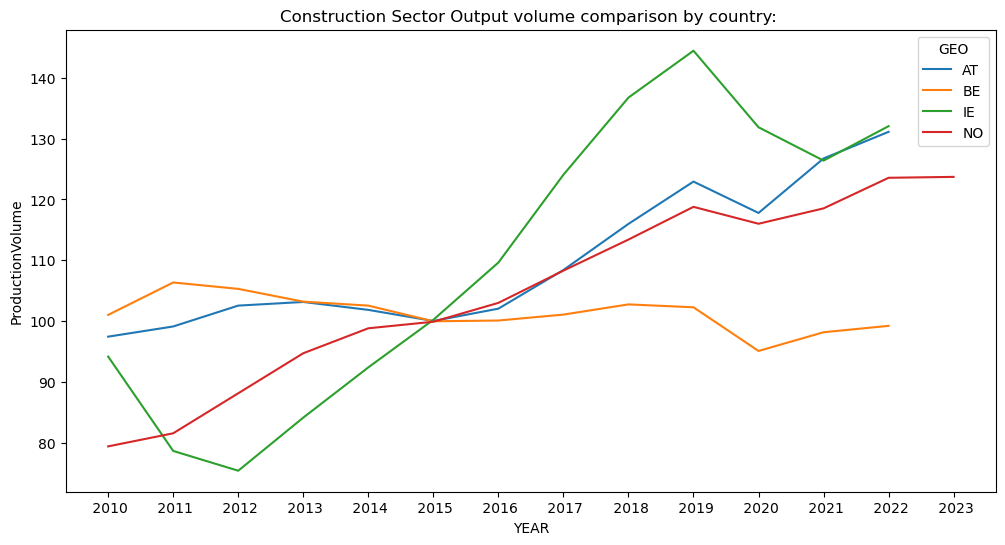

In [19]:
# Using a line plot to show Production volume over years
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x="YEAR", y="ProductionVolume", hue="GEO", data=Yearlyaverage_df, ax=ax)
ax.set_title("Construction Sector Output volume comparison by country: ")
#ax.set_xticks(range(2003, 2024))

plt.show()

In [20]:
# Check for NaN values and remove any rows containing
df_constats = df_constats.dropna()

# Create a dictionary to hold country code to country pairs
codetocountry = {"AT": "Austria", "BE": "Belgium", "IE": "Ireland", "NO": "Norway",}

# Replace country codes with country names for clarity in future visualisations
df_constats["GEO"] = df_constats["GEO"].map(codetocountry)
df_constats.head()


,GEO,PERIOD,YEAR,QUARTER,Permits,LabourInput,ProductionCost,PriceIndex,ProductionVolume
0,Austria,2010Q1,2010,Q1,72.4,87.3,88.3,74.05,97.8
1,Belgium,2010Q1,2010,Q1,116.2,98.8,91.1,90.28,101.0
2,Ireland,2010Q1,2010,Q1,115.7,98.0,97.8,111.53,99.8
3,Norway,2010Q1,2010,Q1,91.3,83.1,84.6,73.93,78.5
4,Austria,2010Q2,2010,Q2,98.1,102.6,88.8,76.54,98.9


In [21]:
# Using dash and inline capabilities to develop a dashboard based on the collected construction sector data
# See code references https://medium.com/plotly/introducing-jupyterdash-811f1f57c02e and https://dash.plotly.com/dash-core-components/graph 
# Build App 
app = JupyterDash(__name__)
app.layout = html.Div([
    html.H1("Construction sector data comparing volume, price, cost"),
    dcc.Graph(id='graph'),
    html.Label([
        "Select GEO",
        dcc.Dropdown(
            id='geo-dropdown',
            clearable=False,
            options=[{'label': geo, 'value': geo} for geo in df_constats['GEO'].unique()],
            value=df_constats['GEO'].unique()[0]
        )
    ]),
])

# Define callback to update graph
@app.callback(
    Output('graph', 'figure'),
    [Input("geo-dropdown", "value")]
)
def update_figure(geo):
    filtered_df = df_constats[df_constats['GEO'] == geo]
    fig = px.scatter(
        filtered_df, x="PriceIndex", y="ProductionCost", color="ProductionVolume",
        color_continuous_scale="oryel",
        render_mode="webgl", title="Choose a country to begin, hover to show collection period."
    )
    # Add hover information for Year & Quarter information
    fig.update_traces(hovertemplate="Year: %{customdata[0]}<br>Quarter: %{customdata[1]}<br>Price Index: %{x}<br>Production Cost: %{y}<br>Production Volume: %{marker.color}",
                      customdata=filtered_df[["YEAR", "QUARTER"]].values) 
    return fig

# Run app and display result inline in the notebook using dash
app.run_server(mode='inline')



Dash is running on http://127.0.0.1:8050/



# Section 5. Descriptive Statistics

In [22]:
Yearlyaverage_df.describe()

,ProductionVolume,PriceIndex,ProductionCost,LabourInput,Permits
count,53.000000,52.000000,54.000000,49.000000,51.000000
mean,106.494025,110.101971,106.118519,106.690986,108.696078
std,15.293288,22.735826,13.309137,17.705821,26.669233
min,75.425000,75.765000,85.825000,76.050000,61.275000
25%,99.125000,93.328125,97.643750,99.975000,98.300000
50%,102.550000,106.917500,101.737500,102.950000,103.975000
75%,117.775000,126.230625,111.187500,113.225000,111.700000
max,144.425000,170.106667,143.525000,170.133333,191.575000


Examine the relationship between production volume and other collected statistics

In [23]:
list_columns_Yearlyaverage = ['Permits', 'LabourInput', 'ProductionCost', 'PriceIndex']

# Use a for loop to generate correlation values for all dataset features
for column in list_columns_Yearlyaverage:
    correlation = Yearlyaverage_df[column].corr(Yearlyaverage_df['ProductionVolume'])
    print(f"Correlation between 'Production Volume' and '{column}': {correlation}")

Correlation between 'Production Volume' and 'Permits': 0.6795503778844191
Correlation between 'Production Volume' and 'LabourInput': 0.9010213308059677
Correlation between 'Production Volume' and 'ProductionCost': 0.6323189939578644
Correlation between 'Production Volume' and 'PriceIndex': 0.8293051494940903


Plot the lowest correlation value and the highest to visualise variable relationships

<function matplotlib.pyplot.show(close=None, block=None)>

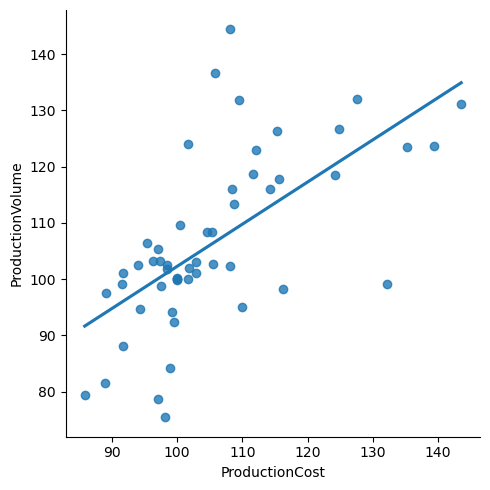

In [24]:
sns.lmplot(x="ProductionCost", y="ProductionVolume", data=Yearlyaverage_df, ci=None)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

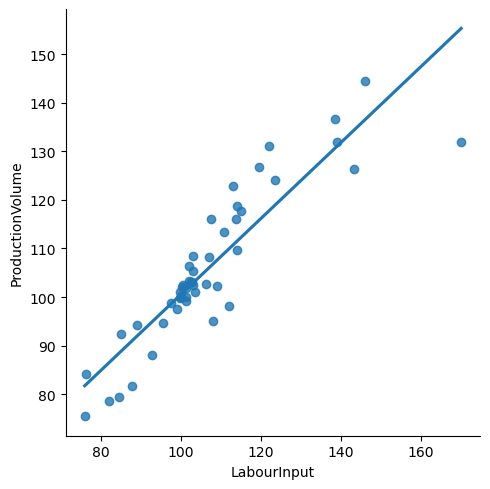

In [25]:
sns.lmplot(x="LabourInput", y="ProductionVolume", data=Yearlyaverage_df, ci=None)
plt.show


# Section 6. Inferential Statistics

Creating a sample of the population (all countries in the dataset and their collected construction sector data)

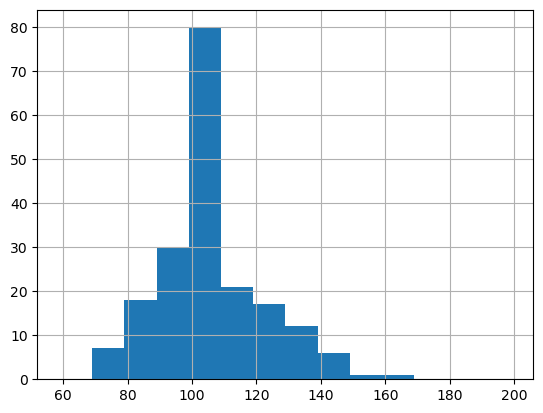

In [26]:
# Plot the ProductionVolume distribution
df_constats["ProductionVolume"].hist(bins=np.arange(59, 200, 10))
plt.show()

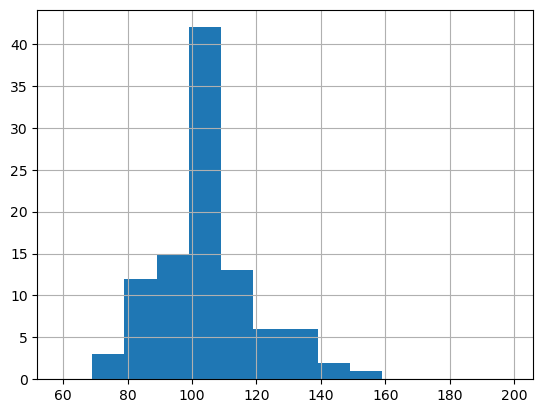

In [27]:
# Create a simple random sample and plot to ensure the distribution is similar shape to the population
prodvol_sample = df_constats.sample(n=100)
prodvol_sample["ProductionVolume"].hist(bins=np.arange(59, 200, 10))
plt.show()

T-test: 

Null Hypothesis "The mean construction production volume (in our population collected data) for Austria is the same as Ireland"

Alternative Hypothesis "The mean construction production volume (in our population collected data) for Austria is less than Ireland"

In [28]:
# Create a new dataframe including only values from Austria and Ireland
ttest_sample_Austria = prodvol_sample[prodvol_sample['GEO'].isin(['Austria'])]
ttest_sample_Ireland = prodvol_sample[prodvol_sample['GEO'].isin(['Ireland'])]

# Generate summary statistics for both countries and assign to variables
xbar_Austria = ttest_sample_Austria['ProductionVolume'].mean()
s_Austria = ttest_sample_Austria['ProductionVolume'].std()
n_Austria = ttest_sample_Austria['ProductionVolume'].count()

xbar_Ireland = ttest_sample_Ireland['ProductionVolume'].mean()
s_Ireland = ttest_sample_Ireland['ProductionVolume'].std()
n_Ireland = ttest_sample_Ireland['ProductionVolume'].count()

# Calculate t-stat
numerator = xbar_Austria - xbar_Ireland
denominator = np.sqrt(s_Austria ** 2 / n_Austria + s_Ireland ** 2 / n_Ireland) 
t_stat = numerator / denominator
#print(t_stat)

# Calcualte degress of freedom
degrees_of_freedom = n_Austria + n_Ireland -2
#print(degrees_of_freedom)

# Calculate p-value
1 - t.cdf(t_stat, df=degrees_of_freedom)


0.25014492959261303

In [29]:
# Create a new dataframe including only values from Belgium and Ireland
ttest_sample_Belgium = prodvol_sample[prodvol_sample['GEO'].isin(['Belgium'])]
ttest_sample_Ireland = prodvol_sample[prodvol_sample['GEO'].isin(['Ireland'])]

# Generate summary statistics for both countries and assign to variables
xbar_Belgium = ttest_sample_Belgium['ProductionVolume'].mean()
s_Belgium = ttest_sample_Belgium['ProductionVolume'].std()
n_Belgium = ttest_sample_Belgium['ProductionVolume'].count()

xbar_Ireland = ttest_sample_Ireland['ProductionVolume'].mean()
s_Ireland = ttest_sample_Ireland['ProductionVolume'].std()
n_Ireland = ttest_sample_Ireland['ProductionVolume'].count()

# Calculate t-stat
numerator = xbar_Belgium - xbar_Ireland
denominator = np.sqrt(s_Belgium ** 2 / n_Belgium + s_Ireland ** 2 / n_Ireland) 
t_stat = numerator / denominator
#print(t_stat)

# Calcualte degress of freedom
degrees_of_freedom = n_Belgium + n_Ireland -2
#print(degrees_of_freedom)

# Calculate p-value
1 - t.cdf(t_stat, df=degrees_of_freedom)

0.8345509070054555

ANOVA:

Is mean labour input significantly different between quarters of a year for the construction sector in countries we have sampled?

<function matplotlib.pyplot.show(close=None, block=None)>

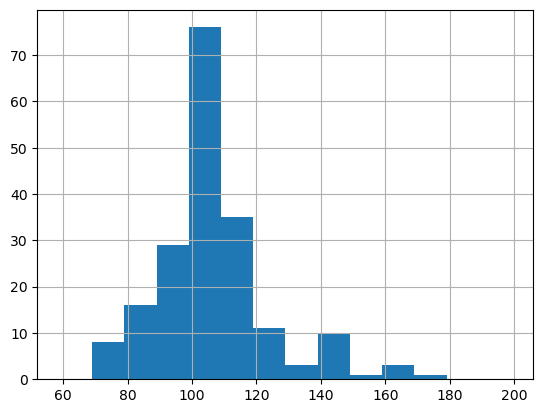

In [30]:
# Plot the LabourInput distribution
df_constats["LabourInput"].hist(bins=np.arange(59, 200, 10))
plt.show

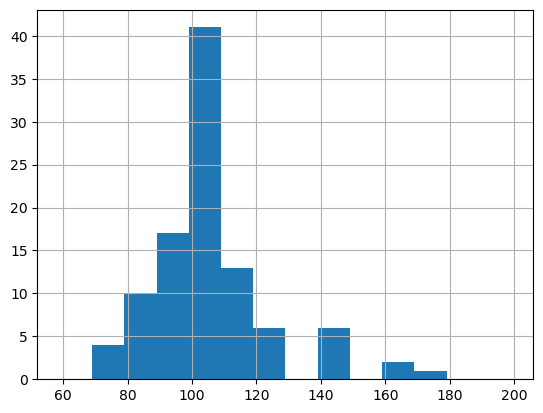

In [31]:
# Create a simple random sample and plot to ensure the distribution is similar shape to the population
labourinput_sample = df_constats.sample(n=100)
labourinput_sample["LabourInput"].hist(bins=np.arange(59, 200, 10))
plt.show()

In [32]:
# Display summary statistics from the sample to show mean Labour Input levels per quarter
labourinput_sample_mean = labourinput_sample.groupby("QUARTER")['LabourInput'].mean()
print(labourinput_sample_mean)

QUARTER
Q1     98.630769
Q2    107.224138
Q3    110.460714
Q4    105.505882
Name: LabourInput, dtype: float64


In [33]:
# Display summary statistics from the sample to show standard deviation levels per quarter
labourinput_sample_mean = labourinput_sample.groupby("QUARTER")['LabourInput'].std()
print(labourinput_sample_mean)

QUARTER
Q1    16.796542
Q2    19.464614
Q3    21.252805
Q4    13.676827
Name: LabourInput, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

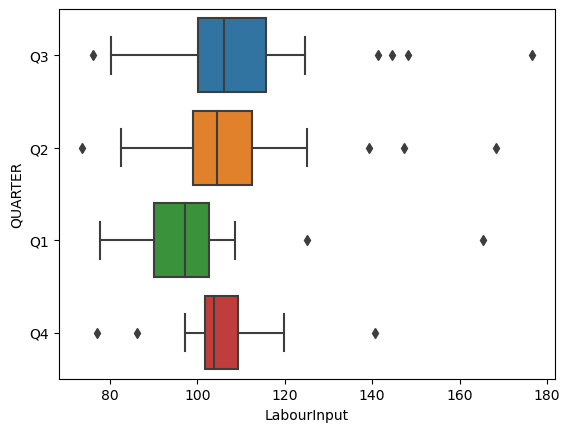

In [34]:
# Visualise differences in mean across quarters
sns.boxplot(x="LabourInput", y="QUARTER", data=labourinput_sample)
plt.show

In [35]:
# Use ANOVA testing to determine significant differences in LabourInput across the Quarters in a year for our sample construction data
alpha = 0.2

pingouin.anova(data=labourinput_sample, dv="LabourInput", between="QUARTER")

,Source,ddof1,ddof2,F,p-unc,np2
0,QUARTER,3,96,1.94925,0.126832,0.057417


In [36]:
# Determine the quarters with significant differences for LabourInput
pingouin.pairwise_tests(data=labourinput_sample, dv="LabourInput", between="QUARTER", padjust="bonf")

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,QUARTER,Q1,Q2,False,True,-1.757212,52.931349,two-sided,0.084664,0.507986,bonf,0.966,-0.464054
1,QUARTER,Q1,Q3,False,True,-2.277416,50.743493,two-sided,0.027008,0.162047,bonf,2.233,-0.605963
2,QUARTER,Q1,Q4,False,True,-1.470661,38.903431,two-sided,0.149425,0.896553,bonf,0.717,-0.431130
3,QUARTER,Q2,Q3,False,True,-0.598996,54.177025,two-sided,0.551672,1.000000,bonf,0.311,-0.156774
4,QUARTER,Q2,Q4,False,True,0.350243,42.396856,two-sided,0.727890,1.000000,bonf,0.316,0.096054
5,QUARTER,Q3,Q4,False,True,0.951187,42.795523,two-sided,0.346851,1.000000,bonf,0.434,0.259013


Wilcoxon-Mann-Whitney

Null Hypothesis "Austria has a higher volume of permits issued per quarter Vs Ireland"

Alternate Hypothesis "Austria does not have a higher volume of permits issued per quarter Vs Ireland"

In [37]:
splitcountry_df = df_constats[df_constats['GEO'].isin(['Austria', 'Ireland'])].copy()
splitcountry_df.head()

,GEO,PERIOD,YEAR,QUARTER,Permits,LabourInput,ProductionCost,PriceIndex,ProductionVolume
0,Austria,2010Q1,2010,Q1,72.4,87.3,88.3,74.05,97.8
2,Ireland,2010Q1,2010,Q1,115.7,98.0,97.8,111.53,99.8
4,Austria,2010Q2,2010,Q2,98.1,102.6,88.8,76.54,98.9
6,Ireland,2010Q2,2010,Q2,133.8,92.6,99.4,107.73,98.9
8,Austria,2010Q3,2010,Q3,97.8,106.0,89.5,78.16,97.1


In [38]:
country_vs_permits = splitcountry_df[['Permits', 'GEO']]
country_vs_permits_wide = country_vs_permits.pivot(columns='GEO', values='Permits') 
print (country_vs_permits_wide)

GEO  Austria  Ireland
0       72.4      NaN
2        NaN    115.7
4       98.1      NaN
6        NaN    133.8
8       97.8      NaN
..       ...      ...
194      NaN    169.0
196     90.1      NaN
198      NaN    172.9
200     85.7      NaN
202      NaN    146.7

[102 rows x 2 columns]


In [39]:
alpha=0.01
pingouin.mwu(x=country_vs_permits_wide['Ireland'], y=country_vs_permits_wide['Austria'], alternative='greater')

,U-val,alternative,p-val,RBC,CLES
MWU,1631.0,greater,0.013601,-0.254133,0.627067


Kruskal-Wallis test


In [40]:
alpha=0.01
pingouin.kruskal(data=df_constats, dv='Permits', between='GEO')

,Source,ddof1,H,p-unc
Kruskal,GEO,3,17.349108,0.000599


# Section 5. Modelling

Sentiment Analysis

In [28]:
# Using PDF reader to open a downloaded construction sector report for Irelands construction sector outlook
# Using NLTK to analyse the reports sentiment scores
report_path = "ria_next_generation_construction_in_ireland.pdf"
with open(report_path, "rb") as file:
    pdf_reader = PyPDF2.PdfReader(file)
    text = ""
    for page_num in range(len(pdf_reader.pages)):
        page = pdf_reader.pages[page_num]
        text += page.extract_text()

sia = SentimentIntensityAnalyzer()
sentiment_scores = sia.polarity_scores(text)

print("Sentiment Scores:")
print("Positive: ", sentiment_scores["pos"])
print("Negative: ", sentiment_scores["neg"])
print("Neutral: ", sentiment_scores["neu"])
print("Compound: ", sentiment_scores["compound"])

Sentiment Scores:
Positive:  0.096
Negative:  0.009
Neutral:  0.895
Compound:  0.9999
